In [147]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch

## xG Plot 

In [90]:
 df = pd.read_html('https://fbref.com/en/matches/f9e94321/Portland-Thorns-FC-North-Carolina-Courage-June-8-2024-NWSL',
                  attrs={'id': 'shots_all'})[0]

In [91]:
df = df.drop(columns=[x for x in df.columns if 'SCA' in x[0]])

df.columns = df.columns.droplevel(0)
df.columns

Index(['Minute', 'Player', 'Squad', 'xG', 'PSxG', 'Outcome', 'Distance',
       'Body Part', 'Notes'],
      dtype='object')

In [92]:
 df.head()

,Minute,Player,Squad,xG,PSxG,Outcome,Distance,Body Part,Notes
0,5,Meredith Speck,Courage,0.03,0.07,Saved,16.0,Head,NaN
1,9,Becky Sauerbrunn,Thorns,0.07,NaN,Off Target,6.0,Head,NaN
2,10,Jessie Fleming,Thorns,0.02,0.18,Saved,25.0,Right Foot,NaN
3,13,Ryan Williams,Courage,0.05,NaN,Off Target,21.0,Right Foot,NaN
4,28,Sophia Smith,Thorns,0.06,NaN,Blocked,25.0,Right Foot,NaN


In [93]:
# Filter the columns we need
df = df[['Squad', 'Player', 'Minute', 'xG', 'Outcome']]
df.head()

,Squad,Player,Minute,xG,Outcome
0,Courage,Meredith Speck,5,0.03,Saved
1,Thorns,Becky Sauerbrunn,9,0.07,Off Target
2,Thorns,Jessie Fleming,10,0.02,Saved
3,Courage,Ryan Williams,13,0.05,Off Target
4,Thorns,Sophia Smith,28,0.06,Blocked


In [94]:
#create a column for the cumulative xG for each team
df['cumulative_xG'] = df.groupby('Squad')['xG'].cumsum()
df

,Squad,Player,Minute,xG,Outcome,cumulative_xG
0,Courage,Meredith Speck,5,0.03,Saved,0.03
1,Thorns,Becky Sauerbrunn,9,0.07,Off Target,0.07
2,Thorns,Jessie Fleming,10,0.02,Saved,0.09
3,Courage,Ryan Williams,13,0.05,Off Target,0.08
4,Thorns,Sophia Smith,28,0.06,Blocked,0.15
5,Courage,Ashley Sanchez,30,0.02,Off Target,0.10
6,Courage,Narumi Miura,30,0.01,Off Target,0.11
7,Thorns,Olivia Moultrie,34,0.01,Off Target,0.16
8,Courage,Meredith Speck,35,0.04,Blocked,0.15
9,Courage,Ashley Sanchez,42,0.08,Blocked,0.23


In [95]:
df = df.dropna(subset=['Minute'])
df['Minute']

0        5
1        9
2       10
3       13
4       28
5       30
6       30
7       34
8       35
9       42
10      45
11    45+3
12    45+4
14      54
15      56
16      56
17      57
18      59
19      61
20      70
21      73
22      79
23      81
24      82
25      90
26    90+4
Name: Minute, dtype: object

In [96]:
#split the match in halves
df['half'] = df['Minute'].apply(lambda x: 1 if int(x.split('+')[0]) <= 45 else 2)
df

C:\Users\fredd\AppData\Local\Temp\ipykernel_14968\3932562637.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['half'] = df['Minute'].apply(lambda x: 1 if int(x.split('+')[0]) <= 45 else 2)


,Squad,Player,Minute,xG,Outcome,cumulative_xG,half
0,Courage,Meredith Speck,5,0.03,Saved,0.03,1
1,Thorns,Becky Sauerbrunn,9,0.07,Off Target,0.07,1
2,Thorns,Jessie Fleming,10,0.02,Saved,0.09,1
3,Courage,Ryan Williams,13,0.05,Off Target,0.08,1
4,Thorns,Sophia Smith,28,0.06,Blocked,0.15,1
5,Courage,Ashley Sanchez,30,0.02,Off Target,0.10,1
6,Courage,Narumi Miura,30,0.01,Off Target,0.11,1
7,Thorns,Olivia Moultrie,34,0.01,Off Target,0.16,1
8,Courage,Meredith Speck,35,0.04,Blocked,0.15,1
9,Courage,Ashley Sanchez,42,0.08,Blocked,0.23,1


In [97]:
# adjust the minute to add the minutes if there is a '+' in the minute
df['Minute'] = df['Minute'].apply(lambda x: sum([int(y) for y in x.split('+')]))
df['Minute']

C:\Users\fredd\AppData\Local\Temp\ipykernel_14968\1739899589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minute'] = df['Minute'].apply(lambda x: sum([int(y) for y in x.split('+')]))


0      5
1      9
2     10
3     13
4     28
5     30
6     30
7     34
8     35
9     42
10    45
11    48
12    49
14    54
15    56
16    56
17    57
18    59
19    61
20    70
21    73
22    79
23    81
24    82
25    90
26    94
Name: Minute, dtype: int64

Text(0.1, 0.0, '@freddys_canvas/twitter')

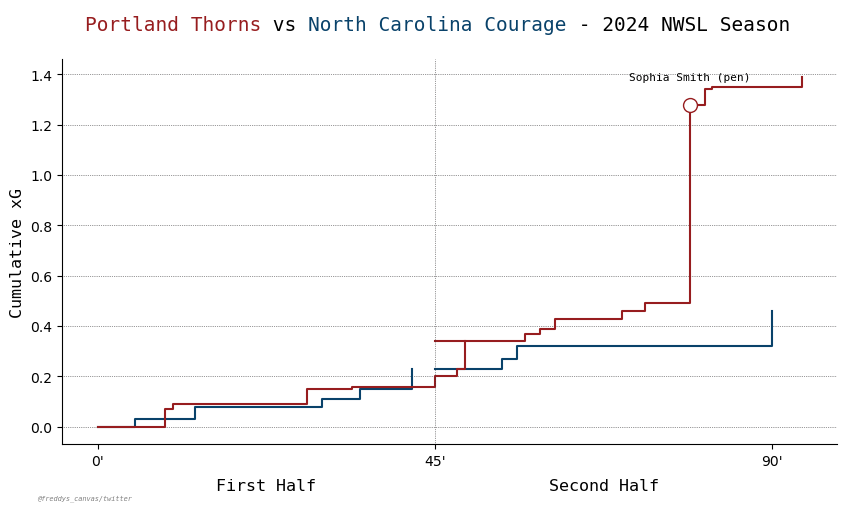

In [98]:
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the xG for each team by half
# We want to make it so the lines both start at 0

home_color = '#971d1f'
away_color = '#09426a'

for team in df['Squad'].unique():
    
    team_df = df[df['Squad'] == team]
    
    # add a 0 xG row at the start of the match
    team_df = pd.concat([pd.DataFrame({'Squad': team, 'Minute': 0, 'xG': 0, 'Outcome': 'Goal', 'cumulative_xG': 0, 'half': 1}, index=[0]), team_df])
    
    # Also add a row at the beginning of the second half to make the lines start where the first half ended
    team_df = pd.concat([team_df[team_df['half'] == 1], pd.DataFrame({'Squad': team, 'Minute': 45, 'xG': 0, 'Outcome': 'Goal', 'cumulative_xG': team_df[team_df['half'] == 1]['cumulative_xG'].iloc[-1], 'half': 2}, index=[0]), team_df[team_df['half'] == 2]])

    for half in team_df['half'].unique():
        half_df = team_df[team_df['half'] == half]
        ax.plot(
            half_df['Minute'], 
            half_df['cumulative_xG'], 
            label=team, 
            drawstyle='steps-post',
            c=home_color if team == 'Thorns' else away_color
        )   
        

# We Can add a scatter plot to show the goals
for team in df['Squad'].unique():
    team_df = df[(df['Squad'] == team) & (df['Outcome'] == 'Goal')].to_dict(orient='records')
    for x in team_df:
        ax.scatter(
            x['Minute'], 
            x['cumulative_xG'], 
            c='white',
            edgecolor=home_color if team == 'Thorns' else away_color,
            s=100,
            # We want the goals to be on top of the lines
            zorder=5
        )
        
        # add a label to the goals for the player who scored
        ax.text(
            x['Minute'], 
            x['cumulative_xG'] + .11, 
            x['Player'], 
            ha='center', 
            va='center', 
            fontfamily='monospace', 
            fontsize=8,
            zorder=10
        )
        
# Let's label the x axis with first and second half
ax.set_xticks([0, 45, 90])
ax.set_xticklabels(['0\'', '45\'', '90\''])

# Lets add the actual words "First Half" and "Second Half" to the plot under the x axis
ax.text(22.5, -.25, 'First Half', ha='center', fontfamily='monospace', fontsize=12)
ax.text(67.5, -.25, 'Second Half', ha='center', fontfamily='monospace', fontsize=12)

# Let's label the y axis with the cumulative xG
ax.set_ylabel('Cumulative xG', fontfamily='monospace', fontsize=12)

#add grids
ax.grid(ls='dotted',lw=.5,color='#363537',axis='y',zorder=1)
plt.axvline(x=45, ls='dotted', color='#363537', lw=.5)

# Let's get rid of the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Let's change the color of the title to show which team is which using the highlight-text package
from highlight_text import fig_text

fig_text(
    0.5,
    0.95,
    '<Portland Thorns> vs <North Carolina Courage> - 2024 NWSL Season', 
    fontsize=14, 
    ha='center', 
    va='center', 
    ax=ax, 
    fontfamily='monospace', 
    highlight_textprops=[{'color': home_color}, {'color': away_color}]
)


# Now let's add a twitter @ to the bottom left of the plot
fig.text(
    0.1, 
    0.00, 
    '@freddys_canvas/twitter', 
    fontsize=5, 
    fontstyle='oblique', 
    fontfamily='monospace', 
    color='gray'
)

## Shot-maps

In [142]:
import json
import os
from mplsoccer import VerticalPitch 

In [171]:
match_url = 'https://www.sofascore.com/portland-thorns-fc-north-carolina-courage/MVusivkb#id:12026304,tab:statistics'

In [172]:
result = os.popen(
    f'curl -H "Host: api.sofascore.com" -H "Accept: */*" -H "User-Agent: curl/8.1.2" https://www.sofascore.com/api/v1/event/12026304/shotmap'
).read()

In [173]:
shotmap = json.loads(result)

In [174]:
shotmap

{'shotmap': [{'player': {'name': 'Sophia Smith',
    'firstName': '',
    'lastName': '',
    'slug': 'smith-sophia',
    'shortName': 'S. Smith',
    'position': 'F',
    'jerseyNumber': '9',
    'userCount': 763,
    'id': 945052},
   'isHome': True,
   'shotType': 'save',
   'situation': 'assisted',
   'playerCoordinates': {'x': 5, 'y': 34, 'z': 0},
   'bodyPart': 'left-foot',
   'goalMouthLocation': 'low-left',
   'goalMouthCoordinates': {'x': 0, 'y': 52.9, 'z': 3.2},
   'blockCoordinates': {'x': 1.1, 'y': 46.4, 'z': 0},
   'id': 3338172,
   'time': 90,
   'addedTime': 4,
   'timeSeconds': 5615,
   'draw': {'start': {'x': 34, 'y': 5},
    'block': {'x': 46.4, 'y': 1.1},
    'end': {'x': 47.1, 'y': 0},
    'goal': {'x': 47.1, 'y': 96.8}},
   'reversedPeriodTime': 1,
   'reversedPeriodTimeSeconds': 685,
   'incidentType': 'shot'},
  {'player': {'name': 'Victoria Pickett',
    'firstName': 'Victoria Pickett',
    'lastName': '',
    'slug': 'victoria-pickett',
    'shortName': 'V. Pic

In [175]:
df = pd.DataFrame(shotmap['shotmap'])

In [176]:
df.head()

,player,isHome,shotType,situation,playerCoordinates,bodyPart,goalMouthLocation,goalMouthCoordinates,blockCoordinates,id,time,addedTime,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,incidentType,goalType
0,"{'name': 'Sophia Smith', 'firstName': '', 'las...",True,save,assisted,"{'x': 5, 'y': 34, 'z': 0}",left-foot,low-left,"{'x': 0, 'y': 52.9, 'z': 3.2}","{'x': 1.1, 'y': 46.4, 'z': 0}",3338172,90,4.0,5615,"{'start': {'x': 34, 'y': 5}, 'block': {'x': 46...",1,685,shot,NaN
1,"{'name': 'Victoria Pickett', 'firstName': 'Vic...",False,post,corner,"{'x': 6.9, 'y': 52.4, 'z': 0}",head,right,"{'x': 0, 'y': 44.6, 'z': 29.1}",NaN,3338169,90,NaN,5390,"{'start': {'x': 52.4, 'y': 6.9}, 'end': {'x': ...",1,10,shot,NaN
2,"{'name': 'Janine Beckie', 'firstName': '', 'la...",True,miss,corner,"{'x': 11.3, 'y': 57.4, 'z': 0}",head,right,"{'x': 0, 'y': 37, 'z': 29.2}","{'x': 1.5, 'y': 60.8, 'z': 0}",3338154,82,NaN,4911,"{'start': {'x': 57.4, 'y': 11.3}, 'block': {'x...",9,489,shot,NaN
3,"{'name': 'Olivia Moultrie', 'firstName': 'Oliv...",True,block,assisted,"{'x': 7.4, 'y': 67.9, 'z': 0}",right-foot,low-centre,"{'x': 0, 'y': 50.3, 'z': 19}","{'x': 5.9, 'y': 64.3, 'z': 0}",3338149,81,NaN,4842,"{'start': {'x': 67.9, 'y': 7.4}, 'block': {'x'...",10,558,shot,NaN
4,"{'name': 'Sophia Smith', 'firstName': '', 'las...",True,goal,penalty,"{'x': 11.5, 'y': 50, 'z': 0}",right-foot,low-left,"{'x': 0, 'y': 54.2, 'z': 7}",NaN,3338143,79,NaN,4721,"{'start': {'x': 50, 'y': 11.5}, 'end': {'x': 4...",12,679,shot,penalty


In [177]:
df.columns

Index(['player', 'isHome', 'shotType', 'situation', 'playerCoordinates',
       'bodyPart', 'goalMouthLocation', 'goalMouthCoordinates',
       'blockCoordinates', 'id', 'time', 'addedTime', 'timeSeconds', 'draw',
       'reversedPeriodTime', 'reversedPeriodTimeSeconds', 'incidentType',
       'goalType'],
      dtype='object')

In [178]:
df_coordinates = pd.json_normalize(df['playerCoordinates'])

In [179]:
df = pd.concat([df, df_coordinates], axis=1)

In [180]:
df = df.drop(columns=['playerCoordinates'])

In [181]:
df.head()

,player,isHome,shotType,situation,bodyPart,goalMouthLocation,goalMouthCoordinates,blockCoordinates,id,time,addedTime,timeSeconds,draw,reversedPeriodTime,reversedPeriodTimeSeconds,incidentType,goalType,x,y,z
0,"{'name': 'Sophia Smith', 'firstName': '', 'las...",True,save,assisted,left-foot,low-left,"{'x': 0, 'y': 52.9, 'z': 3.2}","{'x': 1.1, 'y': 46.4, 'z': 0}",3338172,90,4.0,5615,"{'start': {'x': 34, 'y': 5}, 'block': {'x': 46...",1,685,shot,NaN,5.0,34.0,0
1,"{'name': 'Victoria Pickett', 'firstName': 'Vic...",False,post,corner,head,right,"{'x': 0, 'y': 44.6, 'z': 29.1}",NaN,3338169,90,NaN,5390,"{'start': {'x': 52.4, 'y': 6.9}, 'end': {'x': ...",1,10,shot,NaN,6.9,52.4,0
2,"{'name': 'Janine Beckie', 'firstName': '', 'la...",True,miss,corner,head,right,"{'x': 0, 'y': 37, 'z': 29.2}","{'x': 1.5, 'y': 60.8, 'z': 0}",3338154,82,NaN,4911,"{'start': {'x': 57.4, 'y': 11.3}, 'block': {'x...",9,489,shot,NaN,11.3,57.4,0
3,"{'name': 'Olivia Moultrie', 'firstName': 'Oliv...",True,block,assisted,right-foot,low-centre,"{'x': 0, 'y': 50.3, 'z': 19}","{'x': 5.9, 'y': 64.3, 'z': 0}",3338149,81,NaN,4842,"{'start': {'x': 67.9, 'y': 7.4}, 'block': {'x'...",10,558,shot,NaN,7.4,67.9,0
4,"{'name': 'Sophia Smith', 'firstName': '', 'las...",True,goal,penalty,right-foot,low-left,"{'x': 0, 'y': 54.2, 'z': 7}",NaN,3338143,79,NaN,4721,"{'start': {'x': 50, 'y': 11.5}, 'end': {'x': 4...",12,679,shot,penalty,11.5,50.0,0


In [182]:
df = df.drop(columns=['bodyPart', 'goalMouthCoordinates', 'addedTime',
                     'timeSeconds', 'draw', 'reversedPeriodTimeSeconds',
                     'reversedPeriodTime', 'incidentType', 'blockCoordinates',
                     'goalType'])

In [183]:
df.head()

,player,isHome,shotType,situation,goalMouthLocation,id,time,x,y,z
0,"{'name': 'Sophia Smith', 'firstName': '', 'las...",True,save,assisted,low-left,3338172,90,5.0,34.0,0
1,"{'name': 'Victoria Pickett', 'firstName': 'Vic...",False,post,corner,right,3338169,90,6.9,52.4,0
2,"{'name': 'Janine Beckie', 'firstName': '', 'la...",True,miss,corner,right,3338154,82,11.3,57.4,0
3,"{'name': 'Olivia Moultrie', 'firstName': 'Oliv...",True,block,assisted,low-centre,3338149,81,7.4,67.9,0
4,"{'name': 'Sophia Smith', 'firstName': '', 'las...",True,goal,penalty,low-left,3338143,79,11.5,50.0,0


In [184]:
df_coordinates = pd.json_normalize(df['player'])

In [185]:
df = pd.concat([df, df_coordinates], axis=1)

In [186]:
df = df.drop(columns=['player'])

In [187]:
df.head()

,isHome,shotType,situation,goalMouthLocation,id,time,x,y,z,name,firstName,lastName,slug,shortName,position,jerseyNumber,userCount,id
0,True,save,assisted,low-left,3338172,90,5.0,34.0,0,Sophia Smith,,,smith-sophia,S. Smith,F,9,763,945052
1,False,post,corner,right,3338169,90,6.9,52.4,0,Victoria Pickett,Victoria Pickett,,victoria-pickett,V. Pickett,M,94,13,1115743
2,True,miss,corner,right,3338154,82,11.3,57.4,0,Janine Beckie,,,janine-beckie,J. Beckie,F,16,142,583370
3,True,block,assisted,low-centre,3338149,81,7.4,67.9,0,Olivia Moultrie,Olivia Moultrie,,olivia-moultrie,O. Moultrie,M,13,64,1127371
4,True,goal,penalty,low-left,3338143,79,11.5,50.0,0,Sophia Smith,,,smith-sophia,S. Smith,F,9,763,945052


In [188]:
df.drop(columns=['firstName', 'lastName', 'slug',
                  'shortName', 'jerseyNumber', 'userCount'])

,isHome,shotType,situation,goalMouthLocation,id,time,x,y,z,name,position,id
0,True,save,assisted,low-left,3338172,90,5.0,34.0,0,Sophia Smith,F,945052
1,False,post,corner,right,3338169,90,6.9,52.4,0,Victoria Pickett,M,1115743
2,True,miss,corner,right,3338154,82,11.3,57.4,0,Janine Beckie,F,583370
3,True,block,assisted,low-centre,3338149,81,7.4,67.9,0,Olivia Moultrie,M,1127371
4,True,goal,penalty,low-left,3338143,79,11.5,50.0,0,Sophia Smith,F,945052
5,True,miss,assisted,right,3338079,73,15.8,31.3,0,Jessie Fleming,M,796623
6,True,block,assisted,low-centre,3338080,70,14.1,27.0,0,Sophia Smith,F,945052
7,True,save,assisted,low-centre,3338069,61,7.4,70.0,0,Olivia Moultrie,M,1127371
8,True,block,regular,low-centre,3338066,59,27.8,60.9,0,Kelli Hubly,D,1025455
9,True,miss,fast-break,high-left,3338041,57,19.9,76.5,0,Sophia Smith,F,945052


In [189]:
df = df[['name', 'position', 'id', 'isHome', 'x', 'y', 'z', 'shotType', 
         'situation', 'goalMouthLocation']]

In [190]:
df.head()

,name,position,id,id,isHome,x,y,z,shotType,situation,goalMouthLocation
0,Sophia Smith,F,3338172,945052,True,5.0,34.0,0,save,assisted,low-left
1,Victoria Pickett,M,3338169,1115743,False,6.9,52.4,0,post,corner,right
2,Janine Beckie,F,3338154,583370,True,11.3,57.4,0,miss,corner,right
3,Olivia Moultrie,M,3338149,1127371,True,7.4,67.9,0,block,assisted,low-centre
4,Sophia Smith,F,3338143,945052,True,11.5,50.0,0,goal,penalty,low-left


In [191]:
df = df.drop(columns='z')

In [192]:
df.head()

,name,position,id,id,isHome,x,y,shotType,situation,goalMouthLocation
0,Sophia Smith,F,3338172,945052,True,5.0,34.0,save,assisted,low-left
1,Victoria Pickett,M,3338169,1115743,False,6.9,52.4,post,corner,right
2,Janine Beckie,F,3338154,583370,True,11.3,57.4,miss,corner,right
3,Olivia Moultrie,M,3338149,1127371,True,7.4,67.9,block,assisted,low-centre
4,Sophia Smith,F,3338143,945052,True,11.5,50.0,goal,penalty,low-left


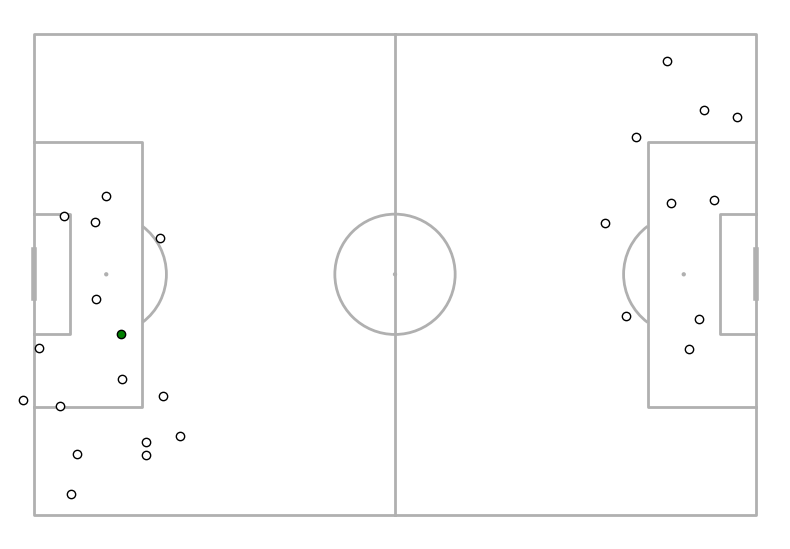

In [212]:
pitch = Pitch(pitch_type='statsbomb', pitch_length=pitch_length,
             pitch_width=pitch_width,)
fig, ax = pitch.draw(figsize=(8,8))

left = df[df['x'] < pitch_length / 2]
right = df[df['x'] >= pitch_length / 2]

for x in df.to_dict(orient='records'):
    if x['isHome'] == False:
        pitch.scatter(x=120-x['x'], y=80-x['y'], ax=ax, ec='black',
                     c='green' if x['shotType'] == 'goal' else 'white')
    else:
        pitch.scatter(x=x['x'], y=x['y'], ax=ax, ec='black',
                      c='green' if x['shotType'] == 'goal' else 'white')
        
plt.show()